C:\Users\Chethan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


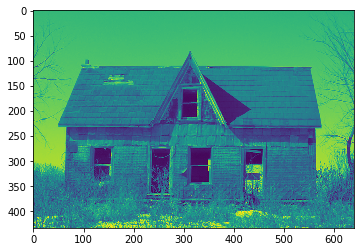

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


# Euclidien distance
# Norm of two points
def distance(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

# Difference in color of the pixel values
def color_diff(c1,c2):
    return abs(c1-c2)

def gaussian(sigma_s, x):
    return ( (math.exp(-(x*x)/(2*(sigma_s**2)))) / (sigma_s * math.sqrt(2*math.pi))  )

def color_distance(sigma_r, x):
    return ( 1 / (1 + (x**2/sigma_r**2)) )


def bilateral_filter(src, filtered_img, diameter, x, y, sigma_s, sigma_r):
    
    hl = int(diameter/2)
    filtered_temp = 0
    w_tot = 0
    for i in range(diameter):
        for j in range(diameter):
            neighbour_x = x - (hl-i)
            neighbour_y = y - (hl-j)
            
            if neighbour_x < 0:
                neighbour_x = 0
            if neighbour_y < 0:
                neighbour_y = 0
            
            if neighbour_x >= len(src):
                neighbour_x -= len(src)
            if neighbour_y >= len(src[0]):
                neighbour_y -= len(src[0])
                
            g_dist = gaussian(sigma_s, distance(x, y, neighbour_x, neighbour_y))
            
            d_col = color_distance( sigma_r, color_diff(src[neighbour_x][neighbour_y] , src[x][y]))
            
            w = g_dist * d_col
            filtered_temp += src[neighbour_x][neighbour_y] * w
            
            w_tot += w
    
    filtered_temp = filtered_temp / w_tot
    
    filtered_img[x][y] = int(filtered_temp)
    return filtered_img
            

def own_filter(src, diameter, sigma_s, sigma_r):
    filtered_img = np.zeros(src.shape)
    
    for i in range(len(src)):
        for j in range(len(src[0])):
            bilateral_filter(src, filtered_img, diameter, i, j, sigma_s, sigma_r)
            
    return filtered_img
    
    
img = cv2.imread('../DATA/original_image_grayscale.png',cv2.IMREAD_GRAYSCALE)
#img.shape
#i = cv2.resize(img, (100,100)) # Resize image if it is too large

output = own_filter(img,5, 2,2)

plt.imshow(output)


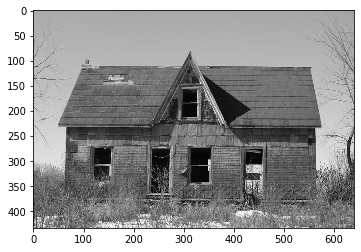

In [11]:
plt.imshow(output, cmap= "gray")

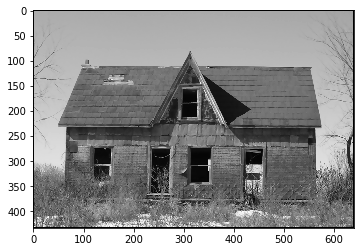

In [12]:
img2 = cv2.imread('../DATA/filtered_image_own.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap= "gray")

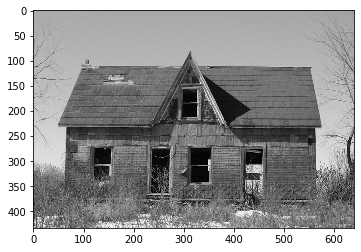

In [13]:
plt.imshow(img, cmap= "gray")